# Frequency Domain Analysis of Continuous-Time Signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

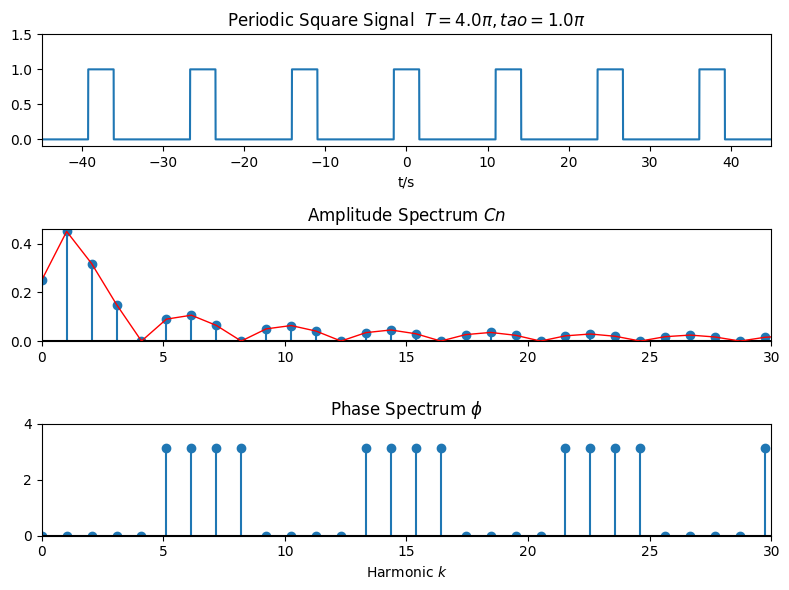

In [2]:
# Test 1
from scipy import signal


# T=4*pi,  tao=pi,  m=40
T = 4 * np.pi
tao = np.pi
m = 40


fig, axs = plt.subplots(3, 1, figsize=(8, 6))

# axs[0] : square signal
duty = tao / T
t = np.linspace(-50, 50, 10000)
squas = (signal.square(np.pi*2/T*(t + tao/2), duty) + 1) / 2
axs[0].plot(t, squas)

axs[0].set_ylim([-0.1, 1.5])
axs[0].set_xlim([-45, 45])
axs[0].set_yticks([0, 0.5, 1, 1.5])
axs[0].set_title(f"Periodic Square Signal  $T={T/np.pi}\pi, tao={tao/np.pi}\pi$")
axs[0].set_xlabel("t/s", fontsize=10)

# fft
an = np.zeros(m)
for n in range(1, m):
    an[n] = 2*np.sin((np.pi*n*tao)/T) / (n*np.pi)
an[0] = tao/T

# axs[1] : amplitude spectrum
k = np.linspace(0, m, m)
amps = np.abs(an)
axs[1].stem(k, amps, basefmt="k")
axs[1].plot(k, amps, "r", linewidth=1)

axs[1].set_xlim([0, 30])
axs[1].set_ylim([0, max(amps)+0.01])
axs[1].set_yticks([0, 0.2, 0.4])
axs[1].set_title("Amplitude Spectrum $Cn$")

# axs[2] : phase spectrum
phas = np.zeros(m)
for n in range(m):
    phas[n] = 0 if an[n] > 0 else np.pi
axs[2].stem(k, phas, basefmt="k")

axs[2].set_xlim([0, 30])
axs[2].set_ylim([0, 4])
axs[2].set_yticks([0, 2, 4])
axs[2].set_title("Phase Spectrum $\phi$")
axs[2].set_xlabel("Harmonic $k$")

plt.tight_layout()
plt.show()

In [3]:
# Test 2
T = 2
def swath(t):
    if 0 <= t <= T/2:
        return -t+1
    elif -T/2 < t < 0:
        return t+1
    else:
        return swath(t-(t/abs(t)*T))

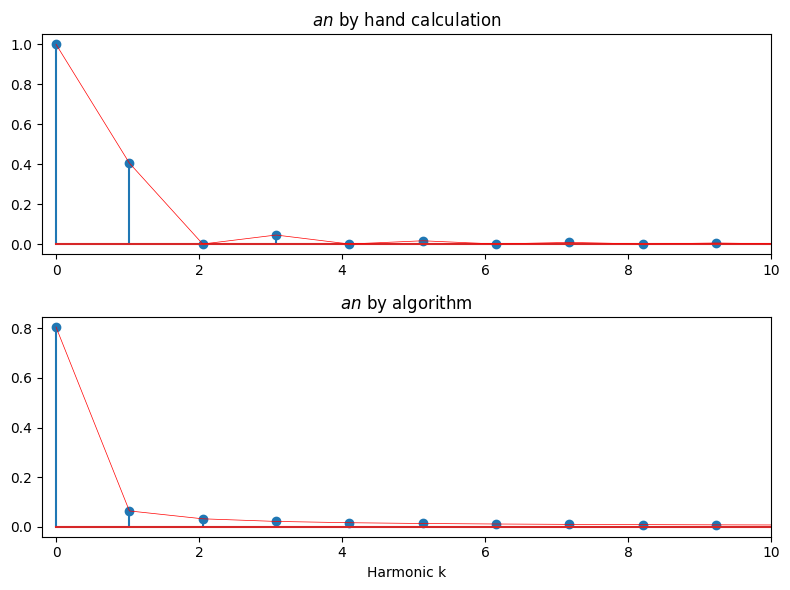

In [4]:
from scipy.fft import fft


fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# 2(1) fft by hand
m = 40
an = np.zeros(m)
for k in range(1, m):
    an[k] = 2*(np.sin(4*np.pi*k/T**2)*(1-2/T) - T/(2*np.pi*k)*(np.cos(4*np.pi*k/T**2)-1)) / (k*np.pi)
an[0] = 8*(1-1/T)/T**2
k = np.linspace(0, m, m)

axs[0].stem(k, an)
axs[0].plot(k, an, "r", linewidth=0.5)
axs[0].set_xlim([-0.2, 10])
axs[0].set_title("$an$ by hand calculation")


# 2(2) fft by scipy
num_of_samples_per_period = m
x = np.linspace(-T/2, T/2, num_of_samples_per_period)
y = np.array([swath(t_) for t_ in t])
F = fft(y, num_of_samples_per_period) / num_of_samples_per_period
amps = abs(F)

axs[1].stem(k, amps)
axs[1].plot(k, amps, "r", linewidth=0.5)
axs[1].set_xlim([-0.2, 10])
axs[1].set_title("$an$ by algorithm")
axs[1].set_xlabel("Harmonic k")

plt.tight_layout()

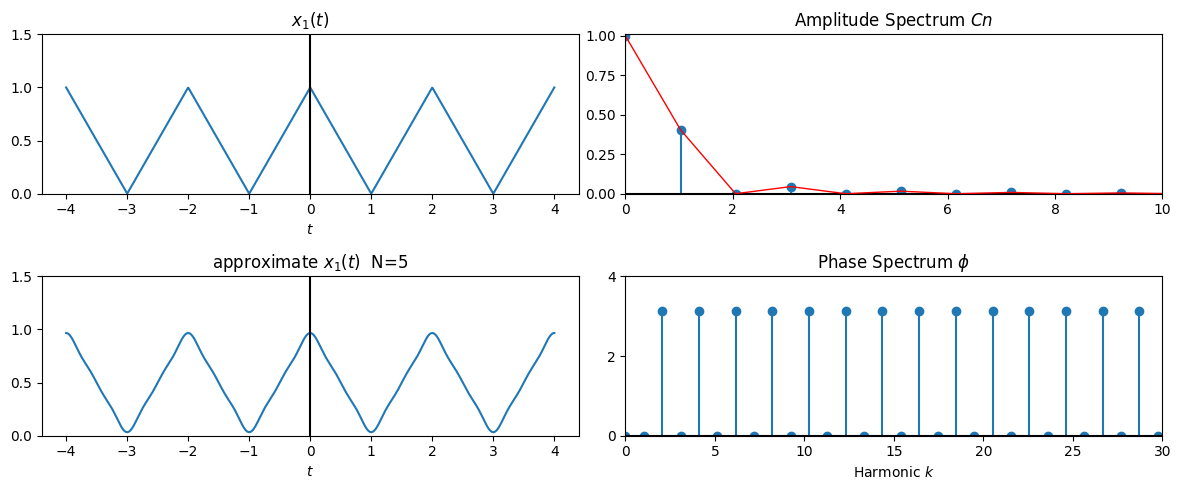

In [5]:
# (4)
fig, axs = plt.subplots(2, 2, figsize=(12, 5))


# orinial x(t)
t = np.linspace(-4, 4, 1000)
swats = np.array([swath(t_) for t_ in t])

axs[0][0].plot(t, swats)
axs[0][0].set_title("$x_1(t)$")
axs[0][0].axvline(x=0, color="k")
axs[0][0].set_ylim([0, 1.5])
axs[0][0].set_xlabel("$t$")


# approximate x(t)
n = 5
def approx_triangle(n, an):
    result = an[0]/2 * np.ones(len(t))
    for k in range(1, n+1):
        result += an[k] * np.cos(2*np.pi*k*t/T)
    return result
appro = approx_triangle(n, an)
axs[1][0].plot(t, appro)

axs[1][0].set_title(f"approximate $x_1(t)$  N={n}")
axs[1][0].axvline(x=0, color="k")
axs[1][0].set_ylim([0, 1.5])
axs[1][0].set_xlabel("$t$")


# amplitude spectrum
amps = np.abs(an)
axs[0][1].stem(k, amps, basefmt="k")
axs[0][1].plot(k, amps, "r", linewidth=1)

axs[0][1].set_xlim([0, 10])
axs[0][1].set_ylim([0, max(amps)+0.01])
axs[0][1].set_title("Amplitude Spectrum $Cn$")


# phase spectrum
axs[1][1].set_title("Phase Spectrum")
phas = np.zeros(m)
for n in range(m):
    phas[n] = 0 if an[n] > 0 else np.pi
axs[1][1].stem(k, phas, basefmt="k")

axs[1][1].set_xlim([0, 30])
axs[1][1].set_ylim([0, 4])
axs[1][1].set_yticks([0, 2, 4])
axs[1][1].set_title("Phase Spectrum $\phi$")
axs[1][1].set_xlabel("Harmonic $k$")


plt.tight_layout()

In [6]:
# Test 3
def u(t):
    if t < 0:   return 0
    else:       return 1

def x1(t):
    return (t+2)*(u(t+2) - u(t+1)) + (u(t+1) - u(t-1)) + (-t+2)*(u(t-1) - u(t-2))
def x2(t):
    return np.cos(np.pi*t/2)*(u(t+1) - u(t-1))

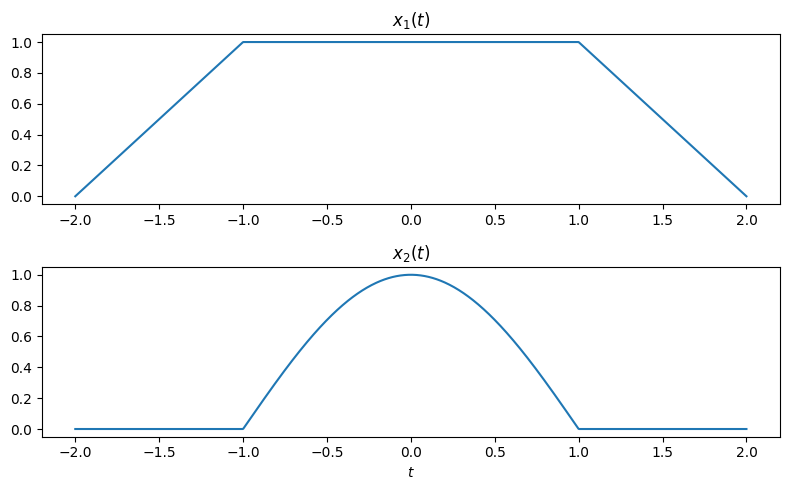

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

# x1(t)
t1 = np.linspace(-2, 2, 1000)
y1 = np.array([x1(t) for t in t1])
axs[0].plot(t1, y1)
axs[0].set_title("$x_1(t)$")

# x1(t)
t2 = np.linspace(-2, 2, 1000)
y2 = np.array([x2(t) for t in t2])
axs[1].plot(t2, y2)
axs[1].set_title("$x_2(t)$")
axs[1].set_xlabel("$t$")

plt.tight_layout()
plt.show()

In [8]:
# fft result
def X1(w):
    return 4*np.sin(3*w/2)*np.sin(w/2)/w**2
def X2(w):
    return np.sin(w-np.pi/2)/(w-np.pi/2) + np.sin(w+np.pi/2)/(w+np.pi/2)

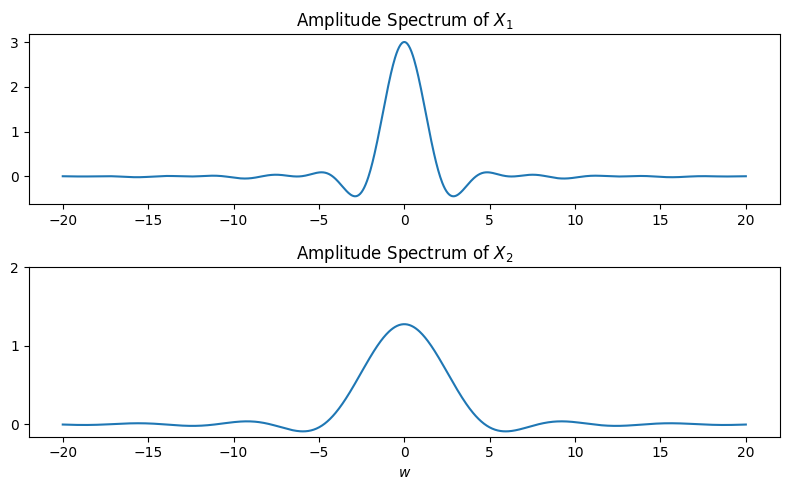

In [9]:
w = np.linspace(-20, 20, 1000)

fig, axs = plt.subplots(2, 1, figsize=(8, 5))

# |X1|
X1s = np.array([X1(w_) for w_ in w])
amps1 = X1s
axs[0].plot(w, amps1)
axs[0].set_title("Amplitude Spectrum of $X_1$")

# |X2|
X2s = np.array([X2(w_) for w_ in w])
amps2 = X2s
axs[1].plot(w, amps2)
axs[1].set_title("Amplitude Spectrum of $X_2$")
axs[1].set_xlabel("$w$")
axs[1].set_yticks([0, 1, 2])


plt.tight_layout()
plt.show()

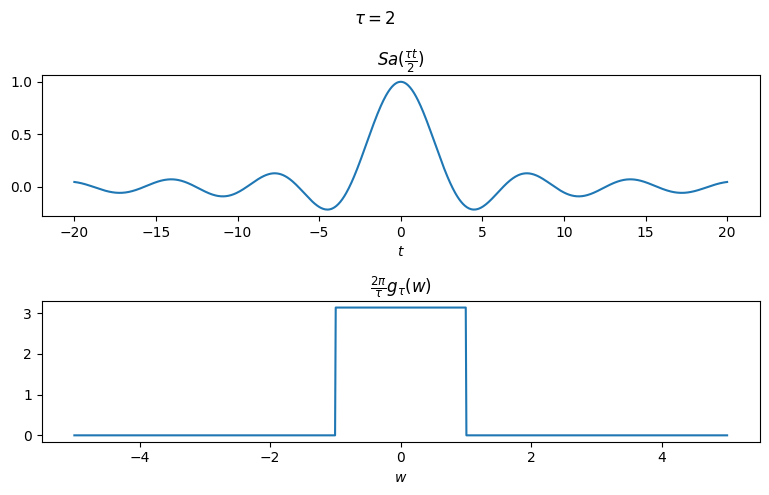

In [10]:
tao = 2

def Sa(t):
    return np.sin(tao*t/2) / (tao*t/2)
def F_Sa(w):
    return 2*np.pi*(u(w+tao/2) - u(w-tao/2)) / tao

fig, axs = plt.subplots(2, 1, figsize=(8, 5))
fig.suptitle(f"$\\tau=${tao}")
# Sa(t)
t = np.linspace(-20, 20, 1000)
ys = np.array([Sa(t_) for t_ in t])
axs[0].plot(t, ys)
axs[0].set_title("$Sa(\\frac{\\tau t}{2})$")
axs[0].set_xlabel("$t$")

# F_Sa(w)
w = np.linspace(-5, 5, 1000)
fs = np.array([F_Sa(w_) for w_ in w])
axs[1].plot(w, fs)
axs[1].set_title("$\\frac{2\pi}{\\tau}g_{\\tau}(w)$")
axs[1].set_xlabel("$w$")

plt.tight_layout()
plt.show()